# Visualizing Block Sizes in SCRIPT Encoding

This notebook explores and visualizes the block sizes for SCRIPT encoding

In [1]:
import matplotlib.pyplot as plt
from script_bpe.encoding.encoder import ScriptEncoding
import pandas as pd
import numpy as np
import math

class ScriptEncodingNS(ScriptEncoding):
    SPLIT_SCRIPTS=[]

In [2]:
print("Number of blocks in ScriptEncoding:", len(ScriptEncoding().export_config()['blocks']))
print("Number of script/category combinations:", len(ScriptEncodingNS().export_config()['blocks']))

Number of blocks in ScriptEncoding: 468
Number of script/category combinations: 381


In [3]:
# Initialize ScriptEncoding and extract block data
script_encoding = ScriptEncodingNS()
blocks = sorted(script_encoding.blocks, key=lambda x: len(x[4]), reverse=True)
block_sizes = [len(block[4]) for block in blocks]
block_labels = [f'{block[1]}-{block[2]}' for block in blocks]

In [4]:

# make df with script, supercategory, and block size
df_blocks = pd.DataFrame({
    'Script': [block[1].replace('_',' ') for block in blocks],
    'Supercategory': [block[2] for block in blocks],
    'Size': [len(block[4]) for block in blocks],
})
# make script/supercat index
df_blocks.set_index(['Script', 'Supercategory']).head(15).style.set_caption("Table 1: Script Blocks and Sizes")


,,Size
Script,Supercategory,
Han,LM,98687
Hangul,LM,11677
Common,PS,7195
Tangut,LM,6914
Egyptian Hieroglyphs,LM,5089
Latin,LM,1448
Arabic,LM,1254
Yi,LM,1165
Cuneiform,LM,1118


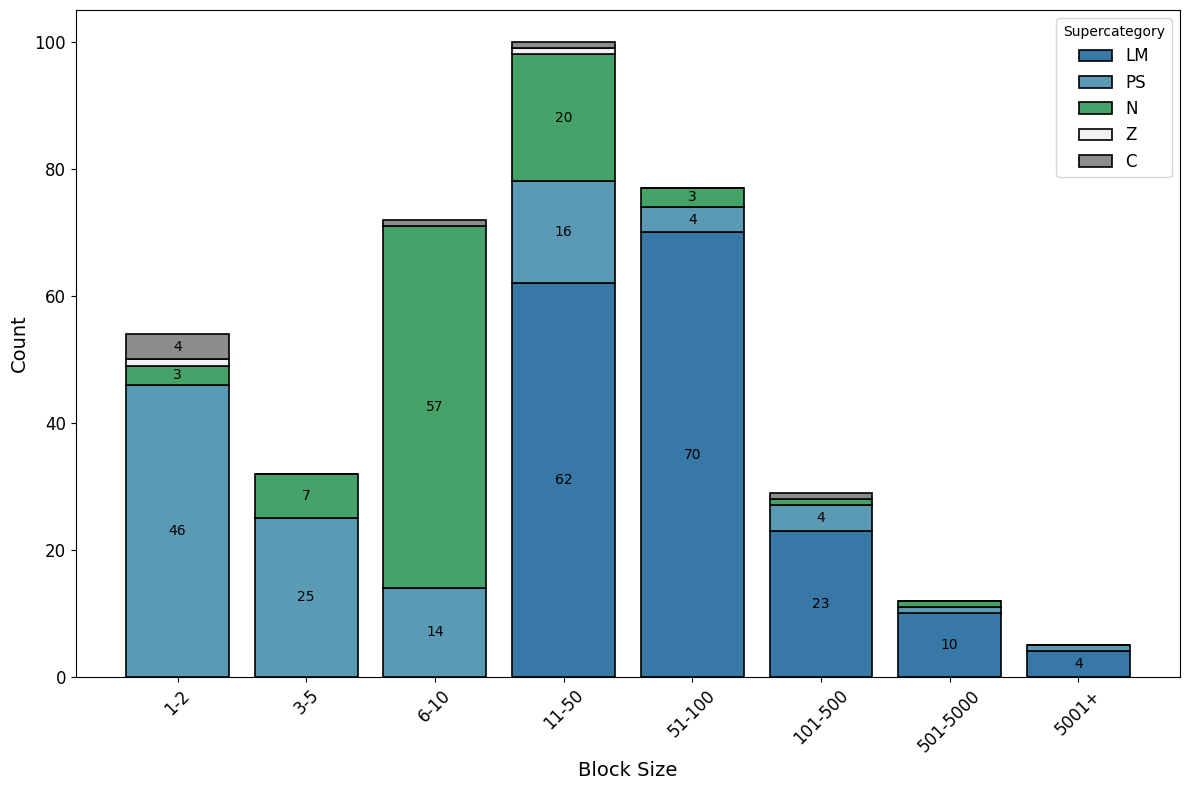

In [5]:
bins = [0.5, 2.5, 5.5, 10.5, 50.5, 100.5, 500.5, 5000.5, 1000000]

bin_labels = [
    f"{math.ceil(bins[i])}-{math.floor(bins[i+1])}" if i < len(bins) - 2 else f"{math.ceil(bins[i])}+"
    for i in range(len(bins) - 1)
]

category_colors = {
    'LM': '#3878a6',
    'PS': '#5b9ab5',
    'N': '#45a36a',
    'Z': '#f0f1f2',
    'C': '#8c8c8c'
}

# Compute counts per bin for each supercategory
stack_counts = {}
for cat in category_colors:
    cat_data = df_blocks[df_blocks['Supercategory'] == cat]['Size']
    counts_cat, _ = np.histogram(cat_data, bins=bins)
    stack_counts[cat] = counts_cat

x_positions = np.arange(len(bin_labels))
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(bin_labels))  # to keep track of the lower bound of each stack

# Loop through each category and plot its counts on top of what was already plotted.
for cat, color in category_colors.items():
    counts = stack_counts[cat]
    bars = plt.bar(x_positions, counts, bottom=bottom, color=color,
                   edgecolor='black', linewidth=1.2, label=cat)
    # Annotate each segment in the stacked bar with its count
    for i, bar in enumerate(bars):
        count = counts[i]
        if count > 1:
            # Place the text at the center of the bar segment
            plt.text(bar.get_x() + bar.get_width()/2,
                     bottom[i] + count/2,
                     str(count),
                     ha='center', va='center', fontsize=10, color='black')
    # Update bottom to include the current category counts
    bottom += counts

plt.xticks(x_positions, bin_labels, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Block Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Supercategory', fontsize=12)
plt.tight_layout()